In [1]:
# K Nearest Neighbors

import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns


In [2]:
titanic=pd.read_csv("ShipDummy.csv")

In [3]:
titanic.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass_2', 'Pclass_3',
       'Gender_male', 'Embarked_Q', 'Embarked_S', 'Title_Col', 'Title_Don',
       'Title_Dr', 'Title_Jonkheer', 'Title_Lady', 'Title_Major',
       'Title_Master', 'Title_Miss', 'Title_Mlle', 'Title_Mme', 'Title_Mr',
       'Title_Mrs', 'Title_Ms', 'Title_Rev', 'Title_Sir', 'Title_the Countess',
       'CabinName_B', 'CabinName_C', 'CabinName_D', 'CabinName_E',
       'CabinName_F', 'CabinName_G', 'CabinName_Not Given', 'CabinName_T'],
      dtype='object')

In [4]:
x=titanic.iloc[:,1:10]
y=titanic.Survived

In [5]:
from sklearn.model_selection import train_test_split


In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10)

In [7]:
# standardize the data
from sklearn.preprocessing import StandardScaler
stdSC=StandardScaler()
stdSC.fit(x_train)
x_train_std=stdSC.transform(x_train)
x_test_std=stdSC.transform(x_test)

In [8]:
x_train_std

array([[ 0.44192631,  0.39889277, -0.48743475, ..., -1.30554718,
        -0.29953744, -1.66553634],
       [-0.54799774,  0.39889277,  0.69229863, ..., -1.30554718,
        -0.29953744,  0.60040719],
       [-0.85258976, -0.46065681, -0.48743475, ..., -1.30554718,
         3.33848087, -1.66553634],
       ...,
       [ 0.06118629, -0.46065681, -0.48743475, ...,  0.76596236,
        -0.29953744,  0.60040719],
       [-1.30947778,  0.39889277, -0.48743475, ...,  0.76596236,
        -0.29953744, -1.66553634],
       [ 0.51807431, -0.46065681, -0.48743475, ...,  0.76596236,
        -0.29953744,  0.60040719]])

In [9]:
# Create Estimator object
from sklearn.neighbors import KNeighborsClassifier

In [10]:
# Set K Nearest Neighbors
knn_Model=KNeighborsClassifier(n_neighbors=1)

In [11]:
knn_Model.fit(x_train_std,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [12]:
knn_Model.score(x_train_std,y_train)

0.9775449101796407

In [13]:
knn_Model.score(x_test_std,y_test)

0.7443946188340808

In [14]:
predTrain=knn_Model.predict(x_train_std)

In [15]:
predTest=knn_Model.predict(x_test_std)

In [16]:
pd.crosstab(y_train,predTrain)

col_0,0,1
Survived,,
0,395,7
1,8,258


In [17]:
pd.crosstab(y_test,predTest)

col_0,0,1
Survived,,
0,116,31
1,26,50


In [18]:
trainAccuracy=[]
testAccuracy=[]

In [19]:
for k in range(1,40):
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train_std,y_train)
    trainAccuracy.append(model.score(x_train_std,y_train))
    testAccuracy.append(model.score(x_test_std,y_test))

In [20]:
from matplotlib import pyplot as plt, style
style.use('ggplot')

In [21]:
plt.figure(figsize=(12,6))


<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

In [22]:
for i in range(1,40):
    print(i)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


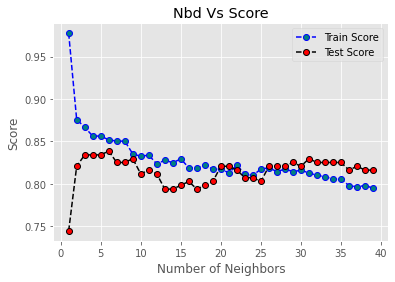

In [23]:

plt.plot(range(1,40),trainAccuracy,label="Train Score",marker="o",markerfacecolor="teal",color="blue",linestyle="dashed")
plt.plot(range(1,40),testAccuracy,label="Test Score",marker="o",markerfacecolor="red",color="black",linestyle="dashed")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Score")
plt.title("Nbd Vs Score")
plt.show()


In [ ]:
# No of neighbors is picked where Scores are highest and also train and test data are close

In [ ]:
# As seen No of Neighbors chosen = 6